In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
%matplotlib inline

In [2]:
n_assets = 4
n_obs = 1000
return_vec = np.random.randn(n_assets, n_obs)

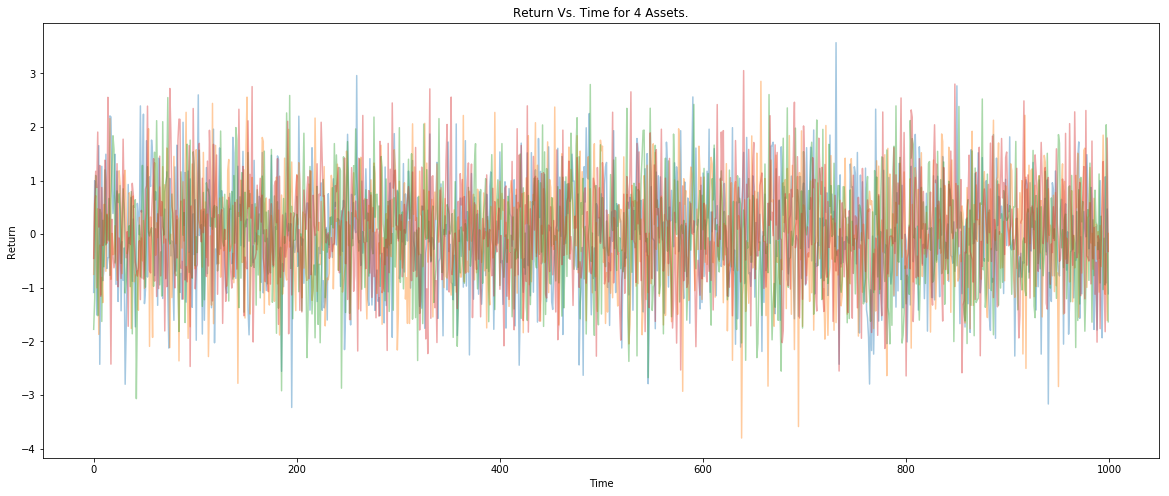

In [3]:
plt.figure(figsize = (20,8))
plt.xlabel("Time")
plt.ylabel("Return")
plt.title("Return Vs. Time for " + str(n_assets) + " Assets.")
plt.plot(return_vec.T, alpha = 0.4);

In [4]:
def random_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

In [5]:
def portfolio_return(weights, returns):
    w = np.asmatrix(weights)
    r = np.asmatrix(np.mean(returns, axis = 1))
    c = np.asmatrix(np.cov(returns))
    mu = w * r.T
    '''
    sigma = np.sqrt(w * c * w.T)
    if sigma > 2:
        return portfolio_values(returns)
    '''
    return mu

def portfolio_vol(weights, returns):
    w = np.asmatrix(weights)
    c = np.asmatrix(np.cov(returns))
    sigma = np.sqrt(w * c * w.T)
    return sigma
    
    
    

In [29]:
def plot_portfolio(n_portfolio, returns):
    n_portfolio = 500
    p_mu = []
    p_sigma = []
    for i in range(n_portfolio):
        weights = random_weights(n_assets)
        p_mu.append(np.array(portfolio_return(weights, returns)).item(0))
        p_sigma.append(np.array(portfolio_vol(weights, returns)).item(0))
    plt.plot(p_sigma, p_mu, 'o', markersize=5)  
    plt.xlabel('std')  
    plt.ylabel('mean')  
    plt.title('Mean and standard deviation of returns of randomly generated portfolios')  

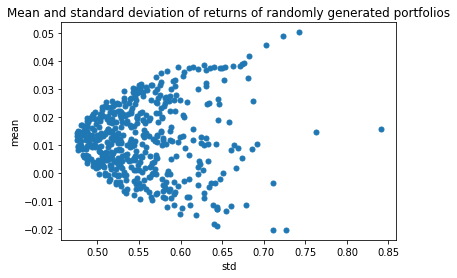

In [30]:
plot_portfolio(500, return_vec)

In [9]:
from scipy.optimize import minimize
def minimize_vol(target_returns, er):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    return_is_target = {
        'type':'eq',
        'args': (er,),
        'fun': lambda weights, er: np.array(target_returns - portfolio_return(weights, er)).item(0)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.array(np.sum(weights) - 1).item(0)
    }
    results = minimize(portfolio_vol, init_guess,
                       args=(er,), method="SLSQP",
                       options={'disp': False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x    

In [49]:
def plot_PFfrontier(returns, n_portfolio = 500, n_points = 50):
    p_mu = []
    p_sigma = []
    for i in range(n_portfolio):
        weights = random_weights(returns.shape[0])
        p_mu.append(np.array(portfolio_return(weights, returns)).item(0))
        p_sigma.append(np.array(portfolio_vol(weights, returns)).item(0))
    plt.plot(p_sigma, p_mu, 'o', markersize=5)  
    plt.xlabel('std')  
    plt.ylabel('mean')  
    plt.title('Mean and standard deviation of returns of randomly generated portfolios')
    
    ret = []
    risk = []
    for i in range(n_points):
        w = minimize_vol(i/500, returns)
        ret.append(np.array(portfolio_return(w, returns)).item(0))
        risk.append(np.array(portfolio_vol(w, returns)).item(0))
    plt.plot(risk, ret, 'y-o')

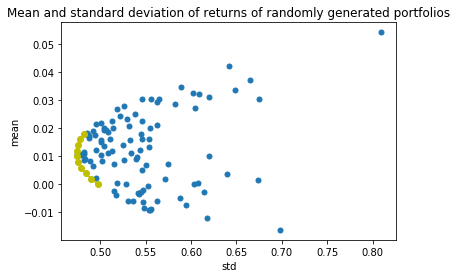

In [51]:
plot_PFfrontier(return_vec, 100, 10)